Objetivo específico: Determinar parâmetros gerais (n° de animais nascidos, período para nascimento e sexagem) da criação animal no biotério do ICC, total e por linhagem, nos últimos 5 anos; 

Pergunta: Dados dos requisitantes, tipos de uso - associação com linhagens e demanda e tipos de ensaios. 
Necessário ter todas essas linhagens? -  Alessandra Aguiar.

Tipo de uso: Não temos informações sobre os Usuários Externos para qual tipo de uso, é realizada apenas a produção dos animais. Já os usuários internos da pra saber, porém, não pelo software BioterC

Quais são os pedidos externos e linhagens?
Qual tipo de uso para cada linhagem?
Qual período de pedidos para cada linhagem?

Quais são os pedidos internos e as linhagens?
Qual tipo de uso para cada linhagem?
Qual período de pedidos para linhagem?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
pedido = pd.read_csv('../tabelas_test/pedido_2019-06-18.csv', index_col='id')
pedido.head()

,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
2,Tania,tschepainski@gmail.com,Usuário Externo,x,Balb/c,2,dia,3,2,83050140,666,666,AAA,666,AAA,1421625600,1411391851,666,1411392413
6,Hálisson Tesseroli Miot,halissontm@gmail.com,LPEP,-,Swiss,4,mes,2,5,0000000000,666,16,1-3-2-16,106,4-1-1-106,1412121600,1411583300,1412619416,1418727743
4,Tania,tschepainski@gmail.com,Usuário Externo,.,Balb/c,2,dia,2,2,81300,666,666,AAA,666,AAA,1420070400,1411491911,666,1411491957
5,Claudemir de Souza,claudemir.s@tecpar.br,VIROMOL,-,Swiss,11,dia,30,5,555555,666,14,1-2-7-14,113,NaN,1412899200,1411579273,1412620096,1422037389
7,Camila Oliveira,halissontm@gmail.com,LPEP,-,Balb/c,6,mes,2,5,0000000000,666,50,2-3-1-50,108,4-1-3-108,1412121600,1411583355,1412082161,1418727745


In [3]:
pedido[pedido['lab'] != 'Usuário Externo']['num_ani'].sum()

1608

In [4]:
pedido['ling'].value_counts()

Balb/c       215
Swiss         82
C57BL/6       37
S129KO        21
C57BL06WT     15
Swiss-2        9
S129WT         6
Swiss-1        3
AG129          2
C3H            2
DBA/1J         1
Name: ling, dtype: int64

In [5]:
test = pedido.groupby('ling')
test.sum()

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim,data_inicio,data_solic,data_forn,data_fim
ling,,,,,,,,,,
AG129,34,42,2,228,1332,1332,3073183200,3072654732,1332,3076982883
Balb/c,2368,2281,772,111102,132739456122,93973738465,320543108767,320728904351,258132858896,299677883430
C3H,14,31,2,1332,4294967294,4294967294,2995765200,2995507986,2995938565,2995938565
C57BL/6,1310,577,69,23474,62277029816,55846189976,56908162800,56728274438,49045750862,56763934276
C57BL06WT,535,232,13,9990,19327354483,19327354459,21807982800,21788893554,20357519393,21813660180
DBA/1J,10,1,1,490,1950101194,11010112,1556766000,1556809204,1556809299,1558552428
S129KO,287,62,13,11281,22680575229,12120249147,31177602000,31172811116,31190229719,31203070063
S129WT,88,23,2,3996,6442451258,6442451230,8737362000,8737017456,8740465714,8740465714
Swiss,933,852,218,58003,64202025883,55368104630,121226025600,121188286723,104867027109,121505411645


In [28]:
#Criando uma variável para receber o filtro só de usuários internos
pedidos_int = pedido[pedido['lab'] != 'Usuário Externo']
pedidos_int.head()

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Transformando todas as datas

datas = ['data_inicio', 'data_solic', 'data_forn', 'data_fim']

for d in datas:
    pedidos_int[d] = pd.to_datetime(pedidos_int[d], unit = 's') #indica o formato das datas
    
pedidos_int.head()
#pedidos_int[pedidos_int['ling'] == 'C3H']
#pedidos_int[pedidos_int['ling'] == 'S129KO']

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
6,Hálisson Tesseroli Miot,halissontm@gmail.com,LPEP,-,Swiss,4,mes,2,5,0000000000,666,16,1-3-2-16,106,4-1-1-106,2014-10-01 00:00:00,2014-09-24 18:28:20,2014-10-06 18:16:56,2014-12-16 11:02:23
5,Claudemir de Souza,claudemir.s@tecpar.br,VIROMOL,-,Swiss,11,dia,30,5,555555,666,14,1-2-7-14,113,NaN,2014-10-10 00:00:00,2014-09-24 17:21:13,2014-10-06 18:28:16,2015-01-23 18:23:09
7,Camila Oliveira,halissontm@gmail.com,LPEP,-,Balb/c,6,mes,2,5,0000000000,666,50,2-3-1-50,108,4-1-3-108,2014-10-01 00:00:00,2014-09-24 18:29:15,2014-09-30 13:02:41,2014-12-16 11:02:25
8,Eloise P. G. Slompo,epgslompo@tecpar.br,LPEP,-,Swiss,3,mes,3,5,A confirmar,666,196,5-7-8-196,107,4-1-2-107,2014-10-24 00:00:00,2014-09-26 19:56:40,2014-09-29 19:21:29,2014-12-03 12:23:33
24,Fabíola Barbieri Holetz,biaholetz@gmail.com,LABREG,-,Swiss,2,dia,2,0,LW-15/13,666,701017,1-1-7-7<br />1-1-7-7,1150101115,<br />4-2-3-115,2014-11-28 05:00:00,2014-11-25 19:23:08,2014-12-03 12:14:51,2015-01-23 18:29:01


In [25]:
pedidos_int['ling'].value_counts()

Balb/c     130
Swiss       50
Swiss-2      9
S129KO       7
Swiss-1      3
C57BL/6      3
AG129        2
DBA/1J       1
Name: ling, dtype: int64

In [8]:
pedidos_int['ling'].replace(['Swiss-1', 'Swiss-2'],'Swiss' ,inplace=True)
pedidos_int['ling'].value_counts()

/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Balb/c     130
Swiss       62
S129KO       7
C57BL/6      3
AG129        2
DBA/1J       1
Name: ling, dtype: int64

In [9]:
pedidos_int[pedidos_int['ling'] == 'Swiss']['num_ani'].sum()

368

In [10]:
inte = pedidos_int.groupby('ling')
inte.sum()

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim
ling,,,,,,
AG129,34,42,2,228,1332,1332
Balb/c,969,1368,605,54492,66588501277,31575777555
C57BL/6,25,29,17,1572,2147484573,1360
DBA/1J,10,1,1,490,1950101194,11010112
S129KO,202,26,7,1957,10737819434,2197494220
Swiss,368,608,216,38437,25745721404,22973109512


In [11]:
pedido_df = pd.DataFrame(pedidos_int['data_solic'])
pedido_df['ling'] = pedidos_int['ling']
pedido_df['lab'] = pedidos_int['lab']
pedido_df['num_ani'] = pedidos_int['num_ani']
pedido_df['data_inicio'] = pedidos_int['data_inicio']
pedido_df['data_forn'] = pedidos_int['data_forn']
pedido_df['data_fim'] = pedidos_int['data_fim']
pedido_df = pedido_df.set_index('data_solic')
pedido_df.head()

,ling,lab,num_ani,data_inicio,data_forn,data_fim
data_solic,,,,,,
2014-09-24 18:28:20,Swiss,LPEP,4,2014-10-01 00:00:00,2014-10-06 18:16:56,2014-12-16 11:02:23
2014-09-24 17:21:13,Swiss,VIROMOL,11,2014-10-10 00:00:00,2014-10-06 18:28:16,2015-01-23 18:23:09
2014-09-24 18:29:15,Balb/c,LPEP,6,2014-10-01 00:00:00,2014-09-30 13:02:41,2014-12-16 11:02:25
2014-09-26 19:56:40,Swiss,LPEP,3,2014-10-24 00:00:00,2014-09-29 19:21:29,2014-12-03 12:23:33
2014-11-25 19:23:08,Swiss,LABREG,2,2014-11-28 05:00:00,2014-12-03 12:14:51,2015-01-23 18:29:01


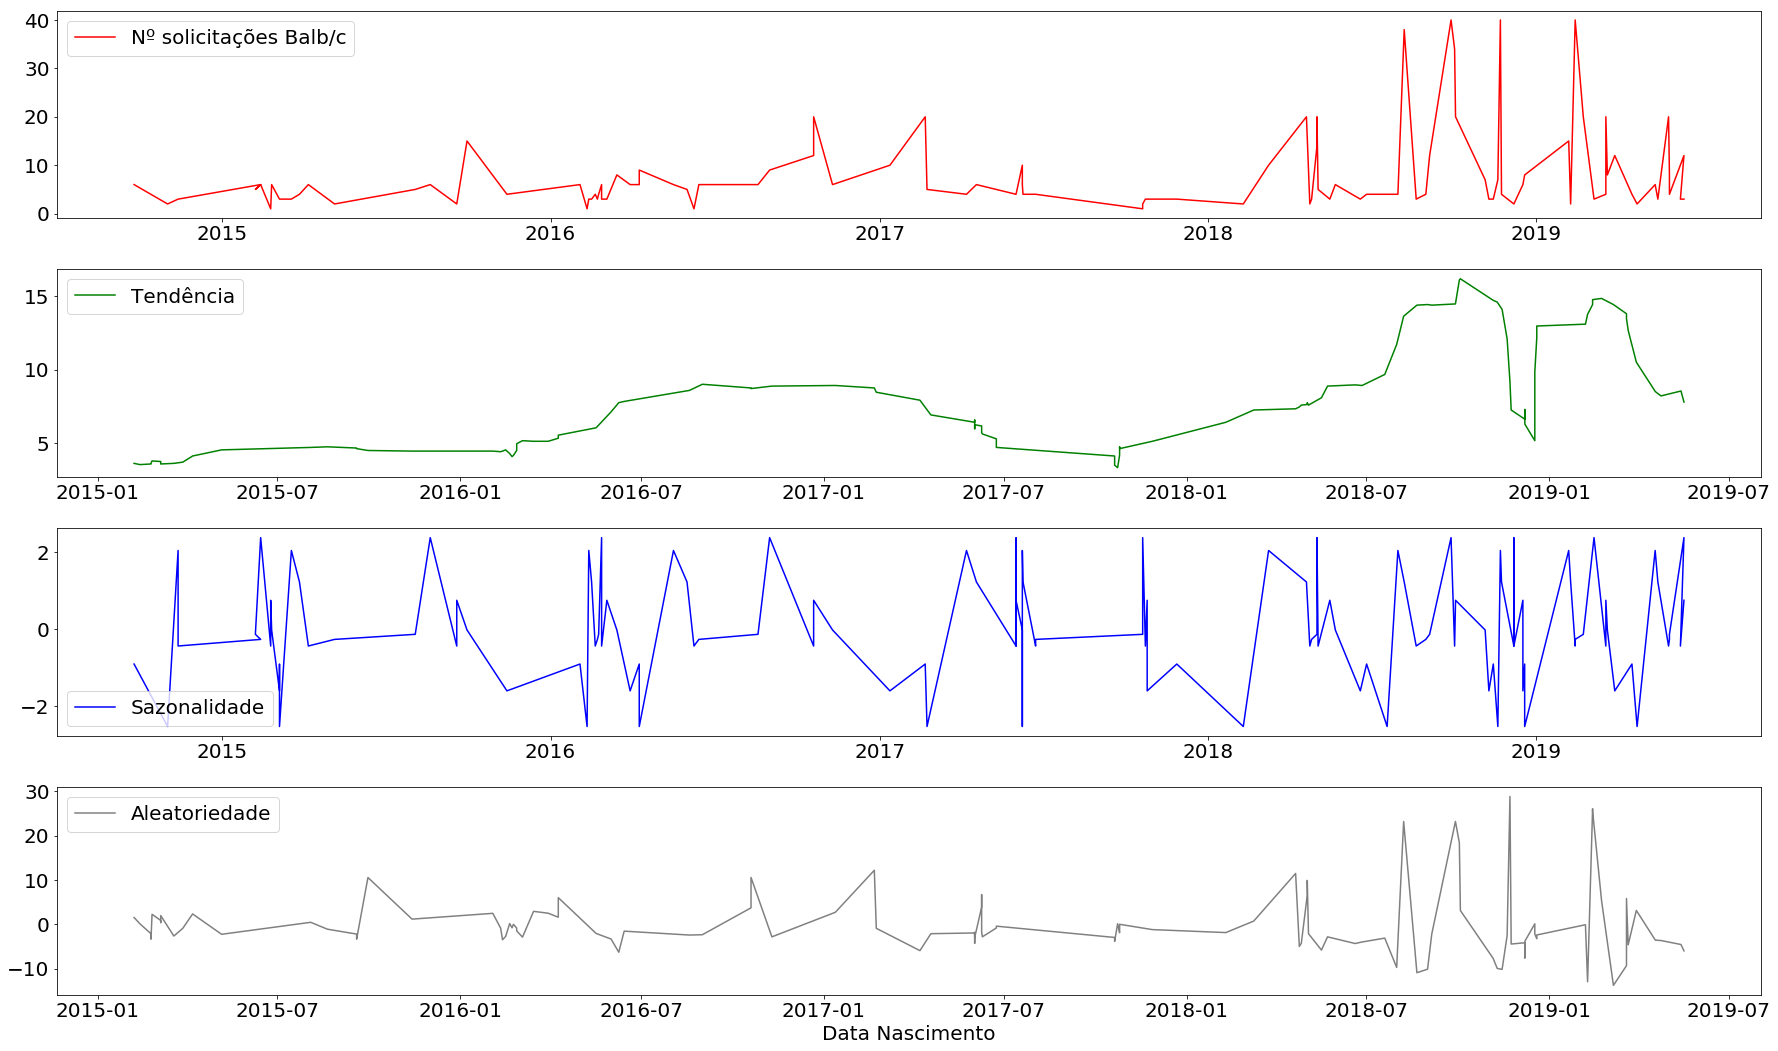

In [12]:
test_grafico = pedido_df[pedido_df['ling'] == 'Balb/c']['num_ani'] 
decom = seasonal_decompose(test_grafico, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.subplot(4, 1, 1)
plt.plot(test_grafico, label = 'Nº solicitações Balb/c', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()


In [13]:
inic = pedidos_int.loc[pedidos_int.index.min(), 'data_solic'] #loc: localizador - localizando a primeira data
fim = pedidos_int.loc[pedidos_int.index.max(), 'data_solic']

Gráfico solicitação de animais usuários internos ICC linhagens mais pedidas ano a ano

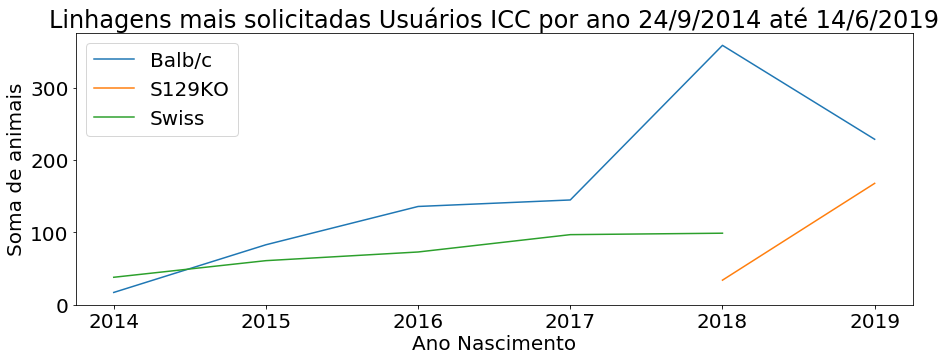

In [26]:
ling_mais_soli_ano = ['Balb/c','S129KO','Swiss']

plt.figure(figsize=(15, 5))
for l in ling_mais_soli_ano:
    pedido_df[pedido_df['ling'] == l]['num_ani'].resample('A').sum().plot()
plt.title(f'Linhagens mais solicitadas Usuários ICC por ano {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_mais_soli_ano)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/14_pergunta_solic_usuarioexterno_mais_ano.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico solicitação de animais usuários internos ICC linhagens mais pedidas mês a mês

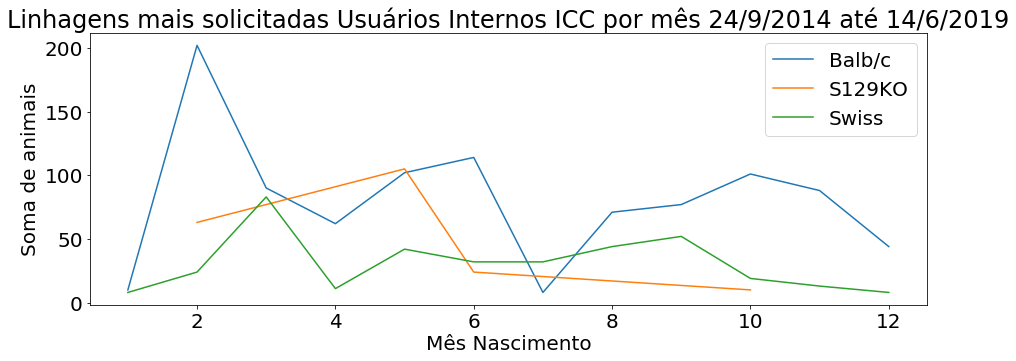

In [15]:
ling_mais_soli_mes = ['Balb/c','S129KO','Swiss']

plt.figure(figsize=(15, 5))
for c in ling_mais_soli_mes:
    pedido_df[pedido_df['ling'] == c]['num_ani'].groupby([lambda x: x.month]).sum().plot()
    
plt.title(f'Linhagens mais solicitadas Usuários Internos ICC por mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_mais_soli_mes)
plt.xlabel('Mês Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/14_pergunta_solic_usuarioexterno_mais_mes.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico solicitação de animais usuários internos ICC linhagens menos pedidas ano a ano

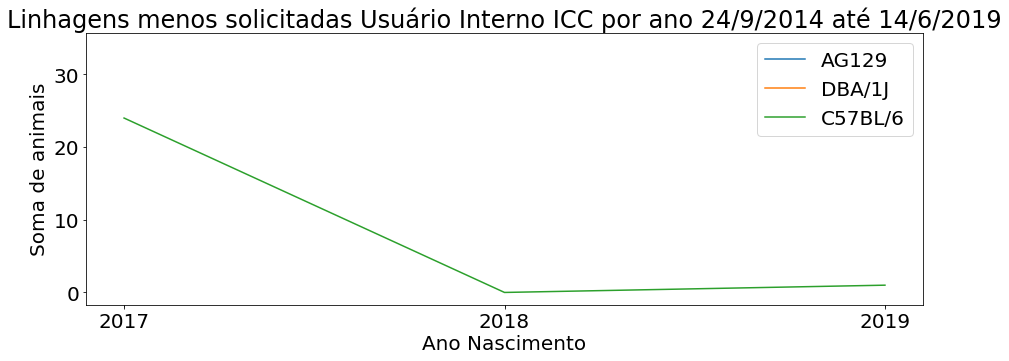

In [16]:
ling_menos_soli_ano = ['AG129', 'DBA/1J', 'C57BL/6' ]

plt.figure(figsize=(15, 5))
for l in ling_menos_soli_ano:
    pedido_df[pedido_df['ling'] == l]['num_ani'].resample('A').sum().plot()
plt.title(f'Linhagens menos solicitadas Usuário Interno ICC por ano {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_menos_soli_ano)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/14_pergunta_solic_usuarioexterno_menos_ano.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico solicitação de animais usuários internos ICC linhagens menos pedidas mês a mês

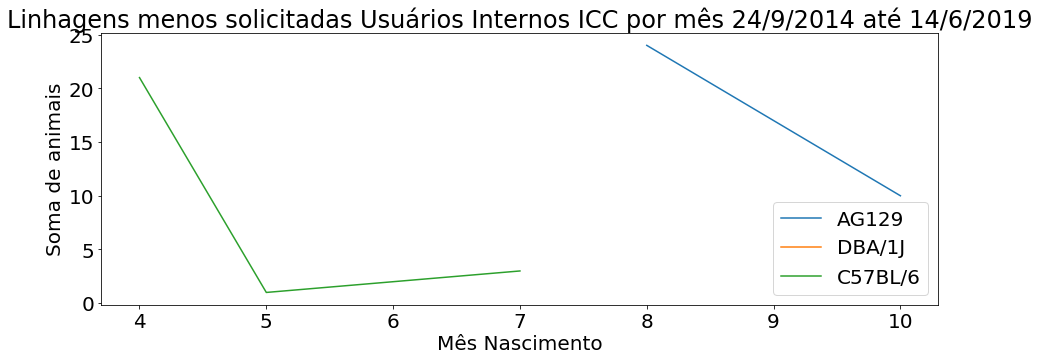

In [17]:
ling_menos_soli_mes = ['AG129', 'DBA/1J', 'C57BL/6']

plt.figure(figsize=(15, 5))
for c in ling_menos_soli_mes:
    pedido_df[pedido_df['ling'] == c]['num_ani'].groupby([lambda x: x.month]).sum().plot()
    
plt.title(f'Linhagens menos solicitadas Usuários Internos ICC por mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_menos_soli_mes)
plt.xlabel('Mês Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/14_pergunta_solic_usuarioexterno_menos_mes.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Primeiros Resultados: As solicitações Internas dos laboratórios do ICC são inferiores aos pedidos externos. As linhagens mais solicitadas são Balb/c, em seguida Swiss e em terceiro a linhagem S129KO. Já as linhagens menos solicitadas são AG129, C57BL/6 e DBA/1J respectivamente.

Resultado por período anual (linhagens mais pedidas):

Balb/c - por ser uma linhagem de produção de anticorpos monoclonais é a linhagem mais solicitada entre os laboratórios do ICC. Com um aumento de solicitação entre os anos 2016 e 2017, com um pico maior de solicitação em 2018.

Swiss - Teve um período constante de solicitação desde o ano 2014 até 2018, onde parou de ser solicitado. Uma hipótese pode ser que os pesquisadores tenham preferência na linhagem Balb/c, substituindo o uso dos Swiss (produção de policlonal).

S129KO - Maior solicitação no ano de 2018 e 2019.

Resultado por período mensal (linhagens mais pedidas):

Balb/c - Linhagem com solicitações superiores em todos os meses. Apenas em Julho há uma queda de solicitação desta linhagem.

Swiss - Solicitação durante o ano todo, com picos maiores em Março e Setembro e baixa solicitação nos demais meses.

S129KO - Solicitações a partir de Fevereiro, com queda em Junho, resuzindo ainda mais em Outubro.

Resultado por período anual (linhagens menos pedidas):

C57BL/6 - É a unica linhagem solicitada que aparece no gráfico, maior produção em 2017 e quase nenhuma solicitação em 2017 ou 2019.

Resultado por período mensal (linhagens menos pedidas):

C57BL/6 - Maior solicitação em Abril e reduzido de Maio a Julho.

AG129 - Uma Unica solicitação durante o período de Outubro.